In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly

In [2]:
df=pd.read_excel(os.path.join('/Users/Roman/DOCUMENTS/CREM/ENERGY_DATA_SWISS/PRE_PROCESS_DATA/Budget - Subventions Valais.xlsx'))

In [3]:
df=df[df['Année']!=2011]
df.fillna(0,inplace=True)
df.set_index('Année',inplace=True)
df

,Subventions communes,Subventions institutions privées,Subventions bourgeoisies,Subventions PB,Subventions ménages privés,Total
Année,,,,,,
2012,750000.0,1500000.0,0.0,0.0,2260000.0,4510000
2013,1750000.0,1550000.0,100000.0,0.0,1600000.0,5000000
2014,1650000.0,1755000.0,100000.0,3400000.0,1750000.0,8655000
2015,1945000.0,1945000.0,70000.0,3800000.0,1340000.0,9100000
2016,1010000.0,2680000.0,1540000.0,3700000.0,0.0,8930000
2017,3200000.0,10900000.0,0.0,1700000.0,16500000.0,32300000


<IPython.core.display.Javascript object>


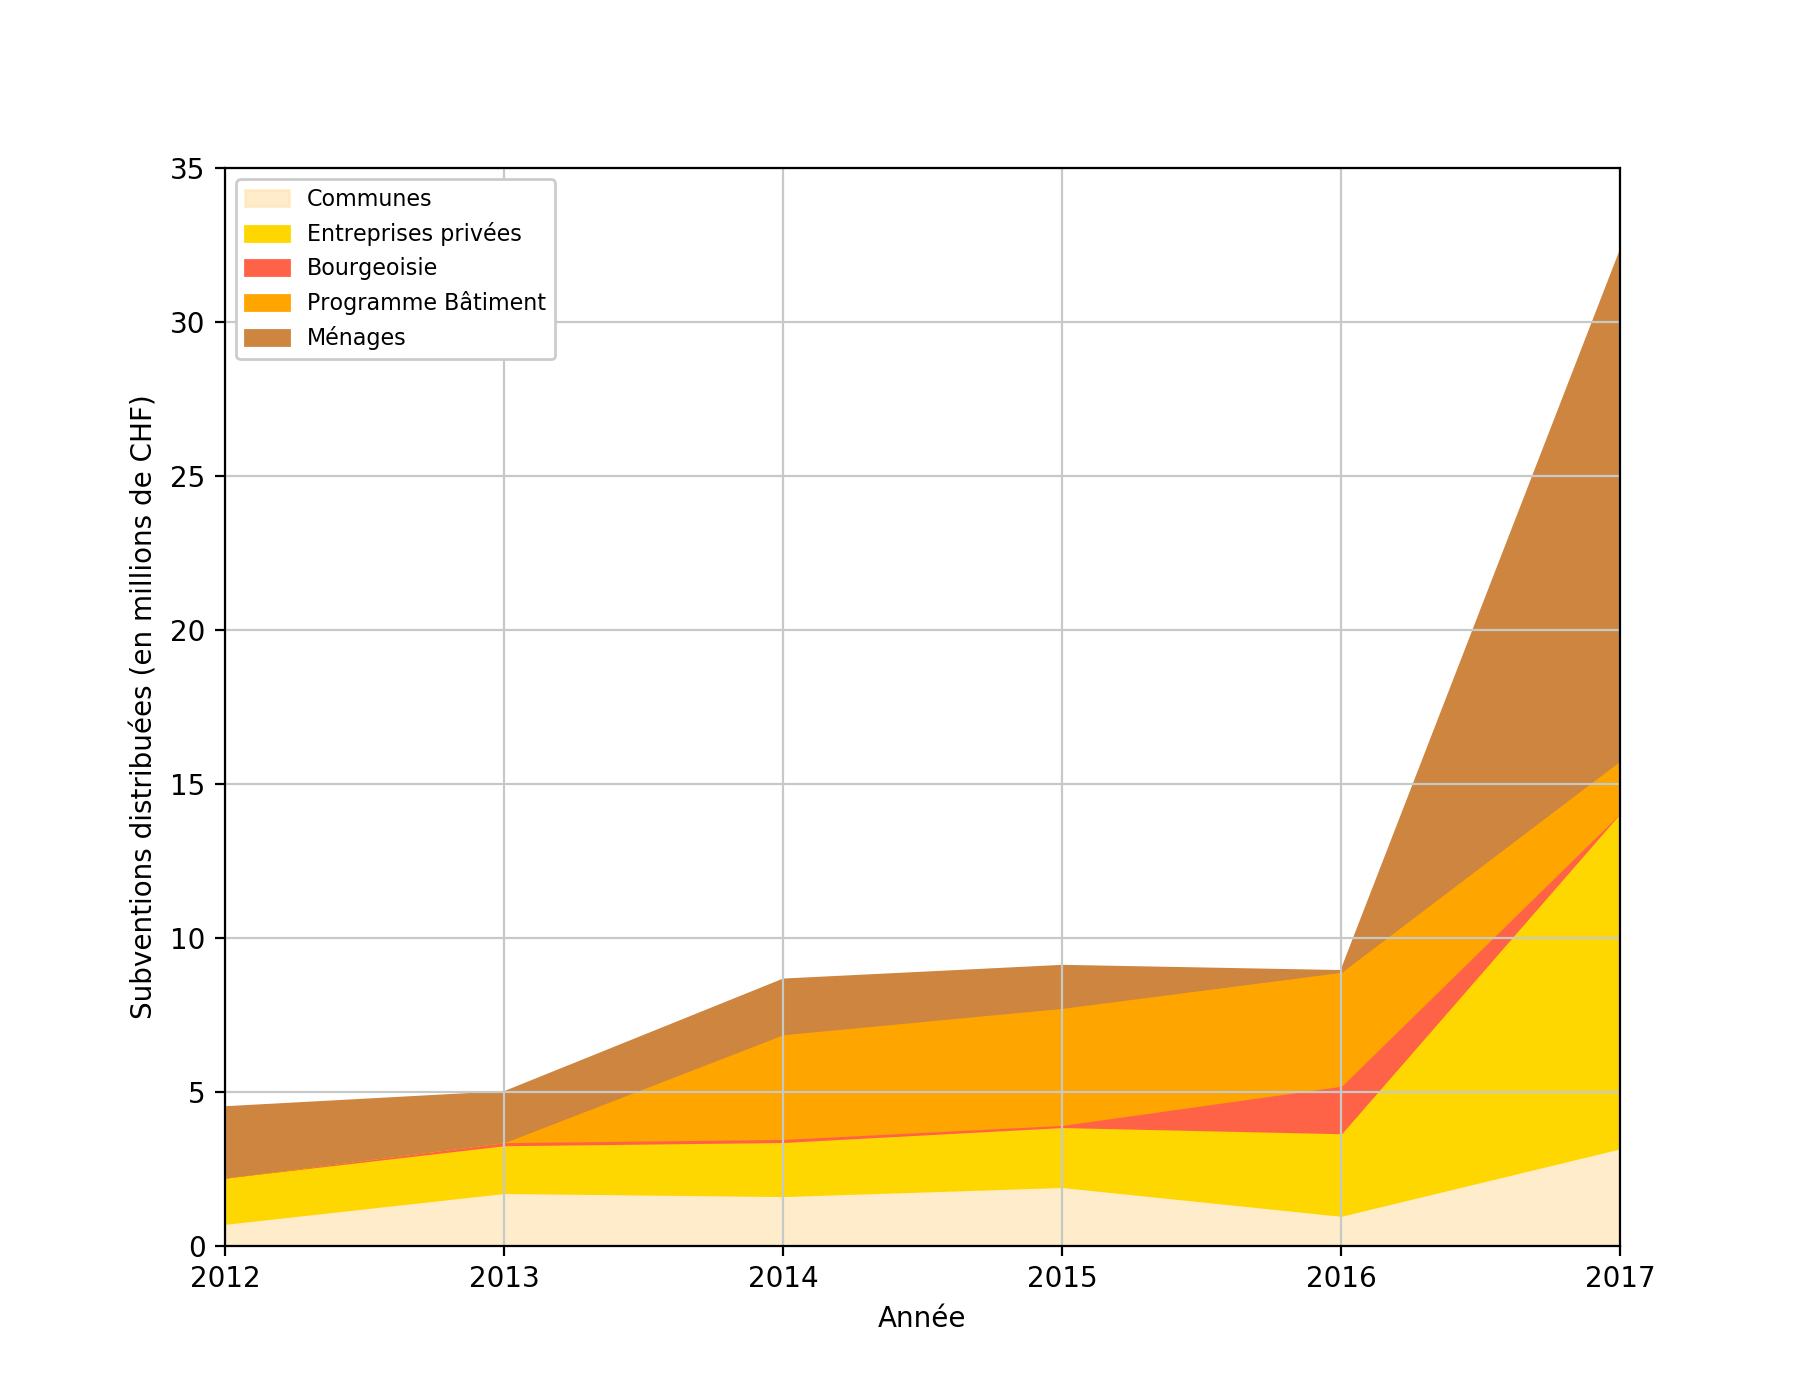

In [10]:
%matplotlib notebook
plt.figure('Analyse des subventions', figsize=(9,7))
plt.fill_between(df.index, 0, df['Subventions communes']/1000000,alpha=0.7, color='moccasin', label='Communes')
plt.fill_between(df.index, df['Subventions communes']/1000000, (df['Subventions communes']+df['Subventions institutions privées'])/1000000, color='gold', label='Entreprises privées')
plt.fill_between(df.index, (df['Subventions communes']+df['Subventions institutions privées'])/1000000, (df['Subventions communes']+df['Subventions institutions privées']+df['Subventions bourgeoisies'])/1000000, color='tomato', label='Bourgeoisie')
plt.fill_between(df.index, (df['Subventions communes']+df['Subventions institutions privées']+df['Subventions bourgeoisies'])/1000000, (df['Subventions communes']+df['Subventions institutions privées']+df['Subventions bourgeoisies']+df['Subventions PB'])/1000000, color='orange', label='Programme Bâtiment')
plt.fill_between(df.index, (df['Subventions communes']+df['Subventions institutions privées']+df['Subventions bourgeoisies']+df['Subventions PB'])/1000000, (df['Subventions communes']+df['Subventions institutions privées']+df['Subventions bourgeoisies']+df['Subventions PB']+df['Subventions ménages privés'])/1000000, color='peru', label='Ménages')
plt.grid(color='xkcd:silver')
plt.xlabel('Année')
plt.ylabel("Subventions distribuées (en millions de CHF)")
plt.axis([2012, 2017, 0, 35])
plt.legend(loc=2, framealpha=1, prop={'size': 8})
plt.savefig('subv_repartition_valais')

<IPython.core.display.Javascript object>


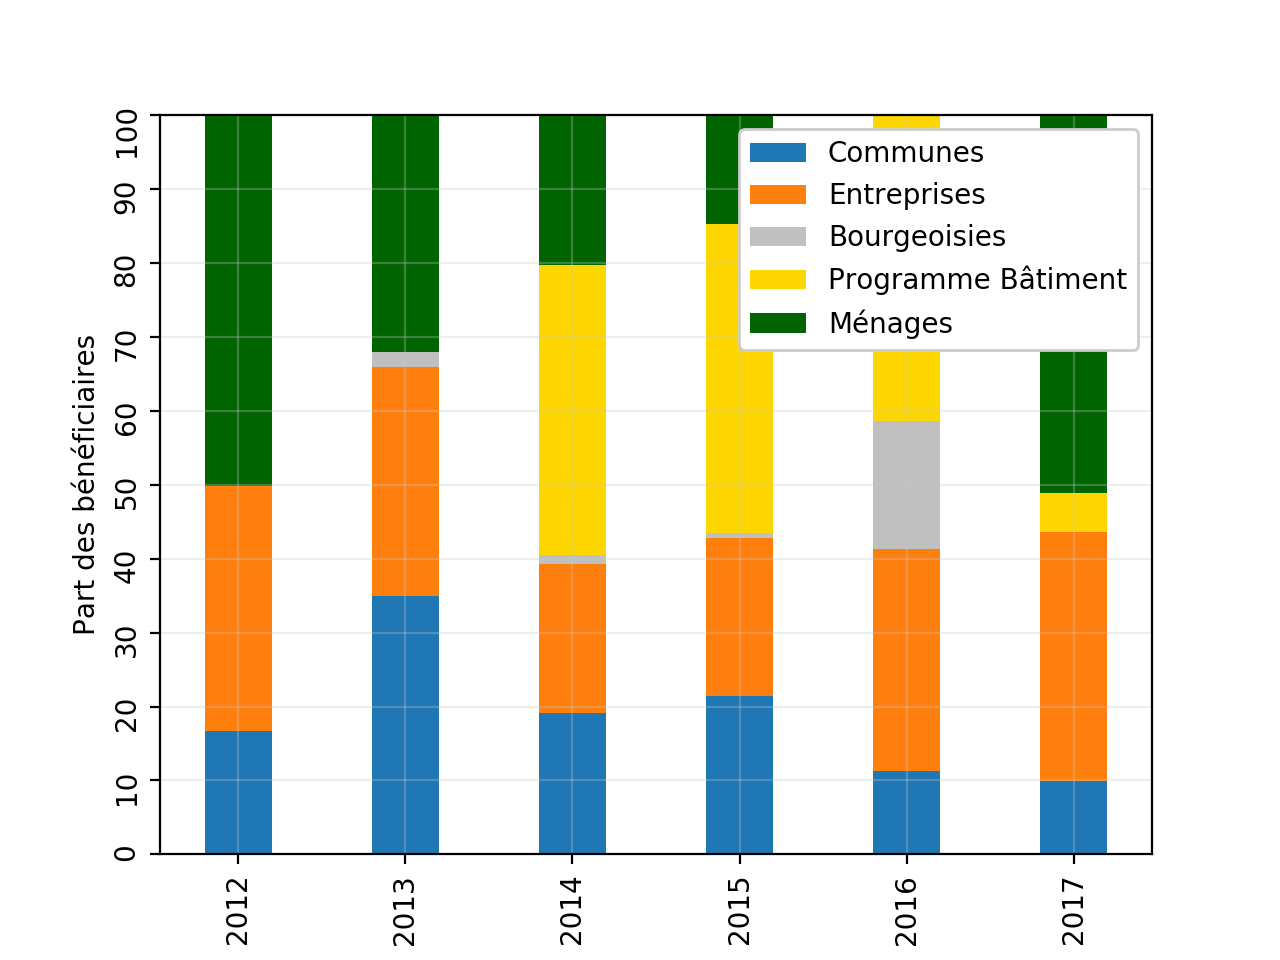

In [5]:
plt.figure('Répartition des subventions par bénéficiaire')
N=np.arange(6)

tot=df['Total']/df['Total'].sum()
A=df['Subventions communes']
B=df['Subventions institutions privées']
C=df['Subventions bourgeoisies']
D=df['Subventions PB']
E=df['Subventions ménages privés']
T=df['Total']

plt.bar(N,100*A/T,width=.4,label='Communes')
plt.bar(N,100*B/T,bottom=100*A/T,width=.4,label='Entreprises')
plt.bar(N,100*C/T,bottom=100*(A+B)/T,width=.4,color='silver',label='Bourgeoisies')
plt.bar(N,100*D/T,bottom=100*(A+B+C)/T,width=.4,color='gold',label='Programme Bâtiment')
plt.bar(N,100*E/T,bottom=100*(A+B+C+D)/T,width=.4,color='darkgreen',label='Ménages')
plt.xticks(N,df.index.tolist(),rotation=90)
plt.yticks(np.arange(0,101,10),rotation = 90)
plt.ylabel('Part des bénéficiaires')
plt.grid(color='xkcd:silver',alpha=0.3)
plt.legend(fancybox=True,framealpha=1)

<IPython.core.display.Javascript object>


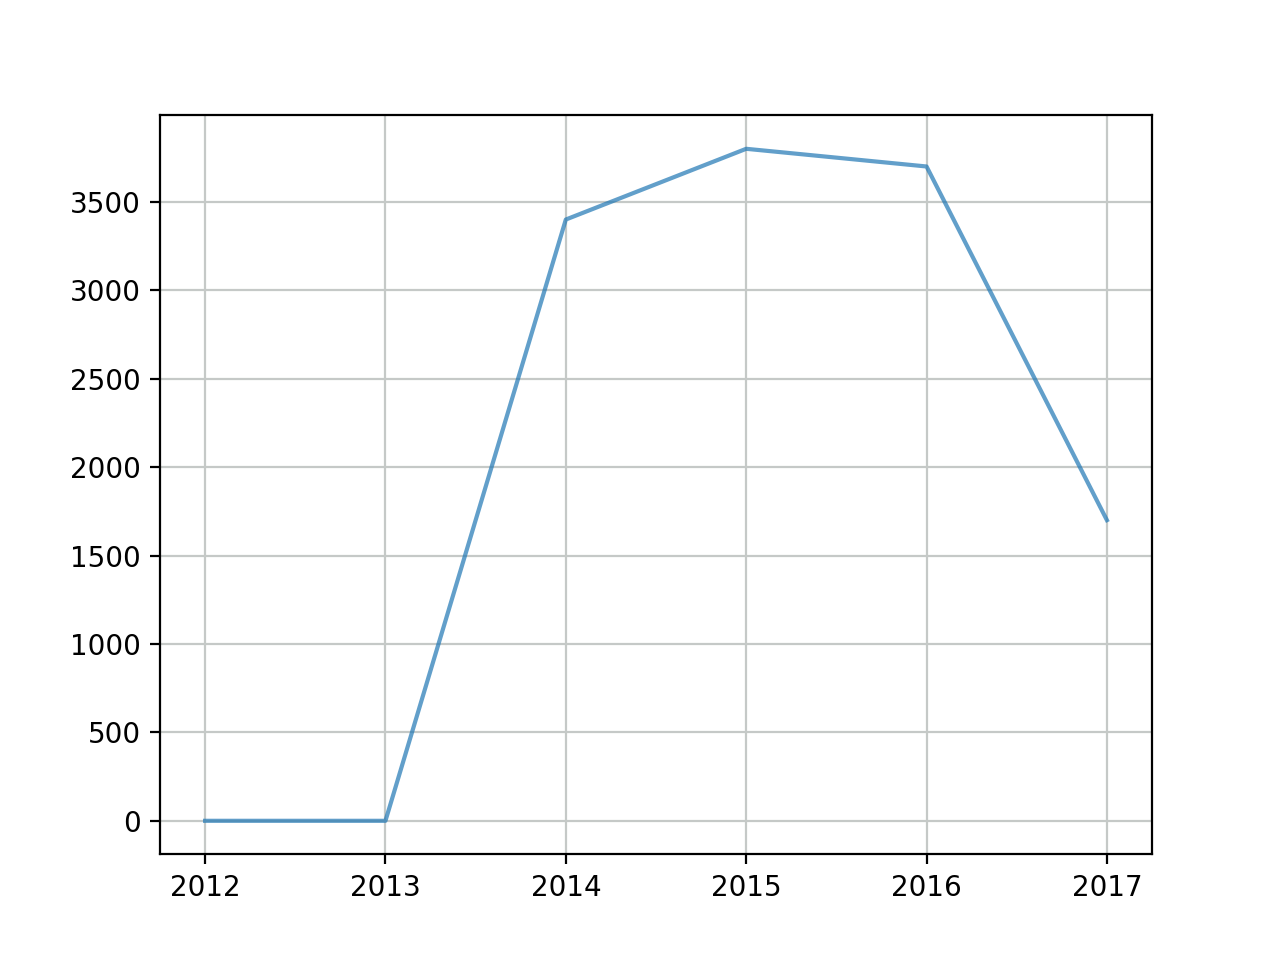

In [6]:
plt.figure('Programme Bâtiment')
plt.plot(df['Subventions PB']/1000,alpha=0.7)
plt.grid(color='xkcd:silver')

In [7]:
fracs = [sum(A), sum(B), sum(C), sum(D), sum(E)]
labels = ['Communes', 'Privés', 'Bourgeoisie', 'Programme Bâtiment', 'Ménages']
colors = ['moccasin', 'gold', 'tomato', 'orange', 'peru']
mean = sum(fracs)/6

In [8]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [9]:
fig = {
    
  "data": [{
      
      "values": fracs,
      "labels": labels,
      "textposition":"inside",
      "name": "HW",
      "hoverinfo":"label+percent",
      "hole": .4,
      "type": "pie",
      "marker": {'colors': colors}
    }],
    
  "layout": {
      
        "title":"Distribution of the last five year grantings",
        
    }
}

py.iplot(fig, filename='donut')